# Decison Tree Classifier

In [282]:
# Load the Titanic dataset from an Excel file
import pandas as pd
titanic = pd.read_excel('TitanicData.xlsx')

In [283]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [284]:
# Check the shape (number of rows and columns) of the dataset
titanic.shape

(891, 25)

In [285]:
# Display the first few rows of the dataset
titanic.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [286]:
# Display data types of each column
titanic.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [287]:
# Check for missing values in the dataset
titanic.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [288]:
# Display the count of each unique value in the 'Survived' column
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [289]:
# Select features (X)
X = titanic.iloc[:, 1:25]
X

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.000000,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,29.699118,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.000000,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [290]:
#Select target variable (y)
y = (titanic['Survived'].values)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [291]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [292]:
# Initialize a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

In [293]:
# Fit the Decision Tree model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [294]:
# Display accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.979


In [295]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

In [296]:
# Display accuracy on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.754


In [297]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[135  33]
 [ 33  67]]


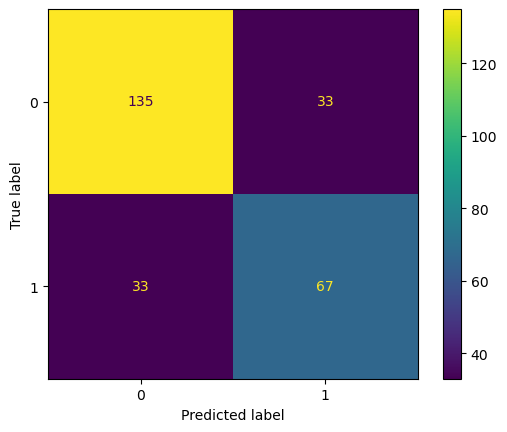

In [298]:
# Display confusion matrix using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test)

In [299]:
# Display accuracy on both training and test sets
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.754


In [300]:
# Prune the decision tree by setting max_depth to 4
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [301]:
# Display accuracy on the training and pruned test set
from sklearn.metrics import accuracy_score
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.821


In [302]:
# Display feature importance in the decision tree in descending order
importance = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by=['Importance'], ascending=False)
importance


,Importance
Sex_male,0.310921
Fare,0.250258
Age,0.221087
Pclass_3,0.105113
Pclass_1,0.023122
SibSp_1,0.022573
SibSp_0,0.018063
Embarked_C,0.013885
Embarked_S,0.010379
Parch_2,0.006006


In [303]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

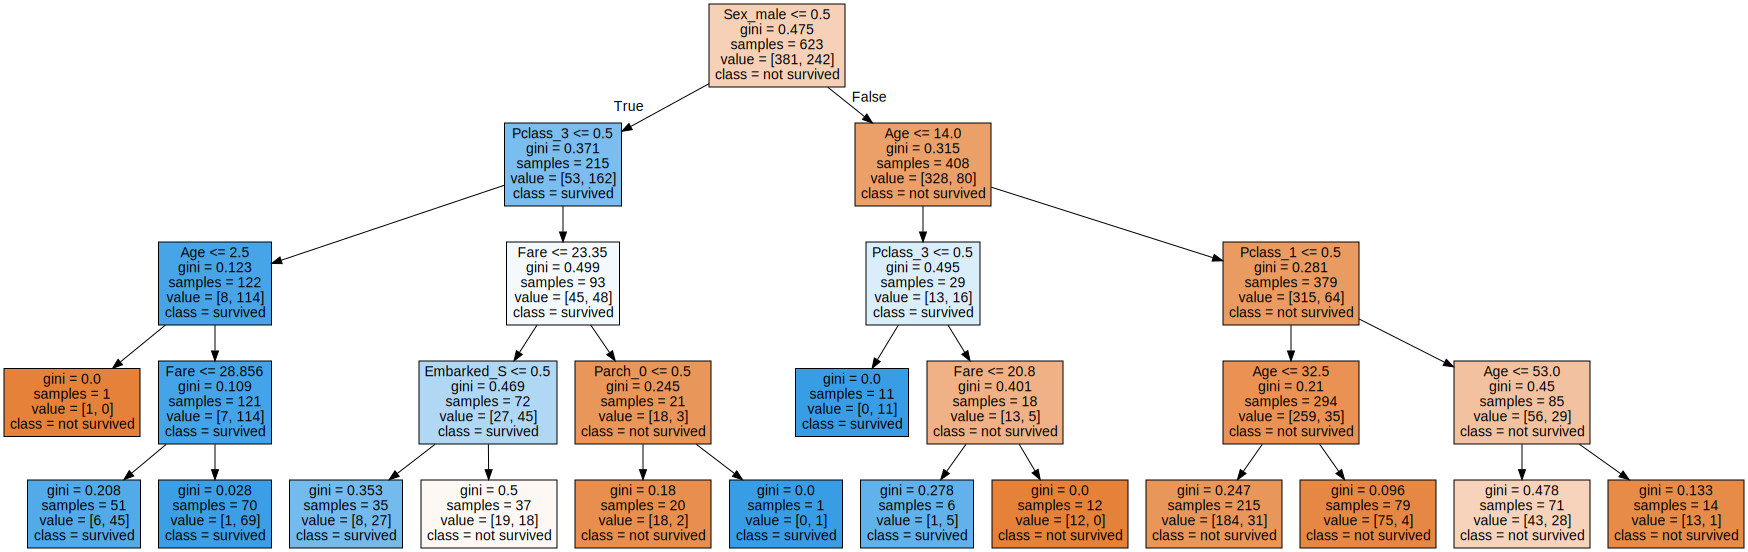

In [304]:
# Visualize the pruned decision tree
dot_data = export_graphviz(tree_pruned,
class_names= ["not survived", "survived"],
feature_names=X_train.columns,
filled = True)
graph = graphviz.Source(dot_data, format= "png")
graph

In [305]:
# Display predicted probabilities for the positive outcome
tree_pruned.predict_proba(X_test)

array([[0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [1.        , 0.        ],
       [0.01428571, 0.98571429],
       [0.22857143, 0.77142857],
       [0.6056338 , 0.3943662 ],
       [0.01428571, 0.98571429],
       [0.01428571, 0.98571429],
       [0.6056338 , 0.3943662 ],
       [0.22857143, 0.77142857],
       [0.85581395, 0.14418605],
       [0.11764706, 0.88235294],
       [0.85581395, 0.14418605],
       [0.11764706, 0.88235294],
       [0.01428571, 0.98571429],
       [0.51351351, 0.48648649],
       [0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [0.94936709, 0.05063291],
       [0.16666667, 0.83333333],
       [0.85581395, 0.14418605],
       [0.01428571, 0.98571429],
       [0.85581395, 0.14418605],
       [0.6056338 , 0.3943662 ],
       [0.51351351, 0.48648649],
       [0.01428571, 0.98571429],
       [0.85581395, 0.14418605],
       [0.51351351, 0.48648649],
       [0.11764706, 0.88235294],
       [0.9       , 0.1       ],
       [0.

In [306]:
# Extract probabilities of positive outcome for further analysis
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

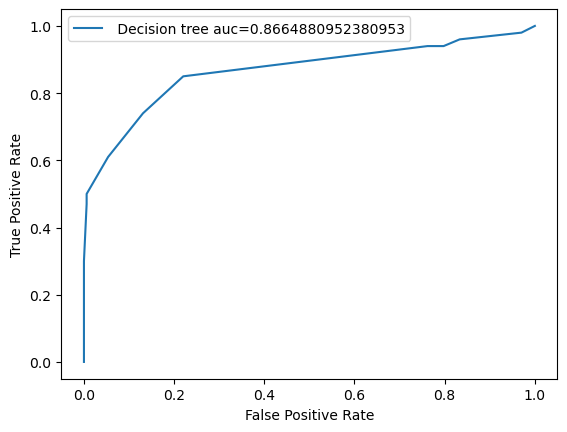

In [307]:
# Calculate ROC curve and AUC value
import sklearn.metrics as metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

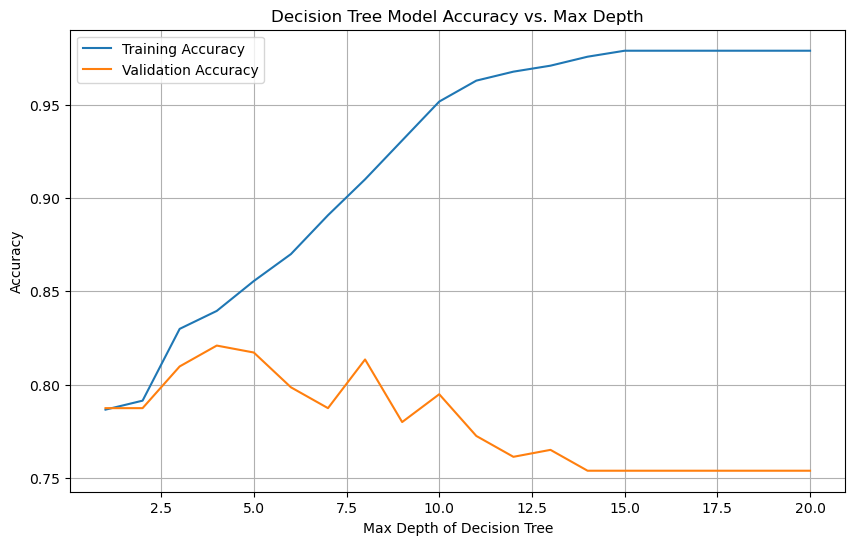

In [308]:
# Explore different max_depth values and plot the training and test accuracies
import matplotlib.pyplot as plt

# Lists to store the accuracies for training and test sets
train_accuracies = []
test_accuracies = []

# Range of `max_depth` values to explore
max_depth_values = range(1, 21)

for depth in max_depth_values:
    # Initialize the model with the current `max_depth`
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    
    # Train the model
    tree.fit(X_train, y_train)
    
    # Record the training set accuracy
    train_accuracy = tree.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Record the test set accuracy
    test_accuracy = tree.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Classifier using feature selection

## Feature Engineering
Here we are combining `SibSp` (number of siblings/spouses) and `Parch` (number of parents/children) into a new feature called `FamilySize` , which offers a more comprehensive representation of a passenger's family structure on the Titanic dataset. This consolidated feature accounts for the total family members on board, capturing potential influences on survival rates, such as coordination challenges in larger families. The merge also simplifies the model by reducing the feature space, promoting generalizability and potentially uncovering interactions between `SibSp` and `Parch` that may impact survival predictions.

In [309]:
# Decode SibSp from one-hot encoded columns
sibsp_columns = [col for col in titanic.columns if col.startswith('SibSp_')]
titanic['SibSp'] = titanic[sibsp_columns].dot(range(len(sibsp_columns)))

# Decode Parch from one-hot encoded columns
parch_columns = [col for col in titanic.columns if col.startswith('Parch_')]
titanic['Parch'] = titanic[parch_columns].dot(range(len(parch_columns)))

# Calculate FamilySize by adding SibSp and Parch, then add 1 for the passenger themselves
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1


In [310]:
# Display the modified dataset with the new FamilySize feature
print(titanic[['SibSp', 'Parch', 'FamilySize']].head())
titanic

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,SibSp,Parch,FamilySize
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,1,0,2
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,2
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,2
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,2,4
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [311]:
# Drop the original one-hot encoded SibSp and Parch columns since they are no longer needed
titanic = titanic.drop('SibSp', axis=1)
titanic = titanic.drop('Parch', axis=1)

In [312]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,2
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,2
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,2
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,4
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [313]:
# List of column prefixes to remove
columns_to_remove_prefixes = ['SibSp_', 'Parch_']

# Generate a list of columns to remove based on prefixes
columns_to_remove = [col for col in titanic.columns if any(col.startswith(prefix) for prefix in columns_to_remove_prefixes)]

# Drop the columns from the DataFrame
titanic = titanic.drop(columns=columns_to_remove)

# Display the DataFrame to confirm the columns have been removed
print(titanic.head())


   Survived   Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0   7.2500         0         0         1           0   
1         1  38.0  71.2833         1         0         0           1   
2         1  26.0   7.9250         0         0         1           1   
3         1  35.0  53.1000         1         0         0           1   
4         0  35.0   8.0500         0         0         1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  FamilySize  
0         1           0           0           1           2  
1         0           1           0           0           2  
2         0           0           0           1           1  
3         0           0           0           1           2  
4         1           0           0           1           1  


In [314]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,22.000000,7.2500,0,0,1,0,1,0,0,1,2
1,1,38.000000,71.2833,1,0,0,1,0,1,0,0,2
2,1,26.000000,7.9250,0,0,1,1,0,0,0,1,1
3,1,35.000000,53.1000,1,0,0,1,0,0,0,1,2
4,0,35.000000,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,0,0,1,1
887,1,19.000000,30.0000,1,0,0,1,0,0,0,1,1
888,0,29.699118,23.4500,0,0,1,1,0,0,0,1,4
889,1,26.000000,30.0000,1,0,0,0,1,1,0,0,1


In [315]:
# Select features (X)
X = titanic.iloc[:, 1:12]
X

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,22.000000,7.2500,0,0,1,0,1,0,0,1,2
1,38.000000,71.2833,1,0,0,1,0,1,0,0,2
2,26.000000,7.9250,0,0,1,1,0,0,0,1,1
3,35.000000,53.1000,1,0,0,1,0,0,0,1,2
4,35.000000,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,1,0,0,1,1
887,19.000000,30.0000,1,0,0,1,0,0,0,1,1
888,29.699118,23.4500,0,0,1,1,0,0,0,1,4
889,26.000000,30.0000,1,0,0,0,1,1,0,0,1


In [316]:
#Select target variable (y)
y = (titanic['Survived'].values)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [317]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [318]:
# Initialize a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

In [319]:
# Fit the Decision Tree model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [320]:
# Display accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.979


In [321]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

In [322]:
# Display accuracy on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.757


In [323]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[138  30]
 [ 35  65]]


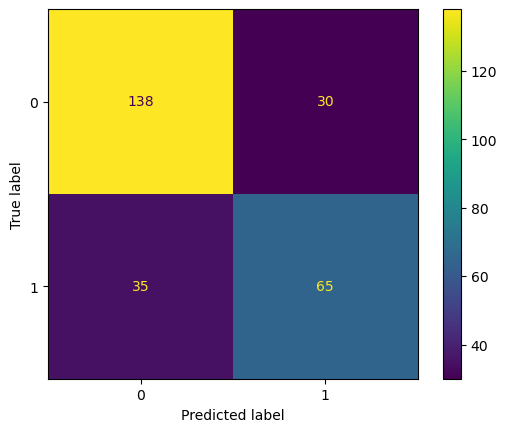

In [324]:
# Display confusion matrix using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test)

In [325]:
# Display accuracy on both training and test sets
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.757


In [326]:
# Prune the decision tree by setting max_depth to 4
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [327]:
# Display accuracy on the training and pruned test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on training set: 0.841
Accuracy on test set: 0.821


In [328]:
# Display feature importance in the decision tree in descending order
importance = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by=['Importance'], ascending=False)
importance

,Importance
Sex_female,0.310921
Fare,0.237234
Age,0.215008
FamilySize,0.110127
Pclass_3,0.078535
Pclass_1,0.023122
Embarked_S,0.012150
Embarked_C,0.005712
Pclass_2,0.003637
Embarked_Q,0.003554


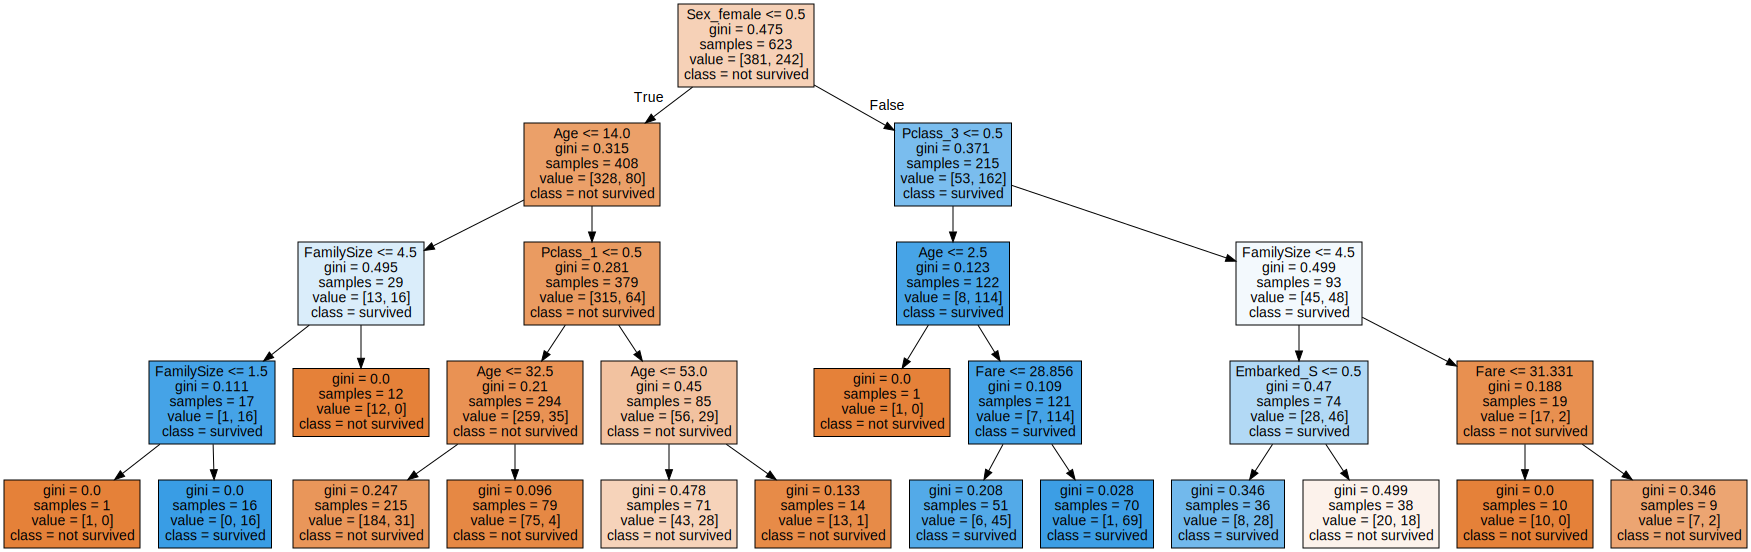

In [329]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Visualize the pruned decision tree
dot_data = export_graphviz(tree_pruned,
class_names= ["not survived", "survived"],
feature_names=X_train.columns,
filled = True)
graph = graphviz.Source(dot_data, format= "png")
graph

In [330]:
# Display predicted probabilities for the positive outcome
tree_pruned.predict_proba(X_test)

array([[0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [1.        , 0.        ],
       [0.01428571, 0.98571429],
       [0.22222222, 0.77777778],
       [0.6056338 , 0.3943662 ],
       [0.01428571, 0.98571429],
       [0.01428571, 0.98571429],
       [0.6056338 , 0.3943662 ],
       [0.22222222, 0.77777778],
       [0.85581395, 0.14418605],
       [0.11764706, 0.88235294],
       [0.85581395, 0.14418605],
       [0.11764706, 0.88235294],
       [0.01428571, 0.98571429],
       [0.52631579, 0.47368421],
       [0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [0.94936709, 0.05063291],
       [0.        , 1.        ],
       [0.85581395, 0.14418605],
       [0.01428571, 0.98571429],
       [0.85581395, 0.14418605],
       [0.6056338 , 0.3943662 ],
       [0.52631579, 0.47368421],
       [0.01428571, 0.98571429],
       [0.85581395, 0.14418605],
       [0.52631579, 0.47368421],
       [0.11764706, 0.88235294],
       [1.        , 0.        ],
       [0.

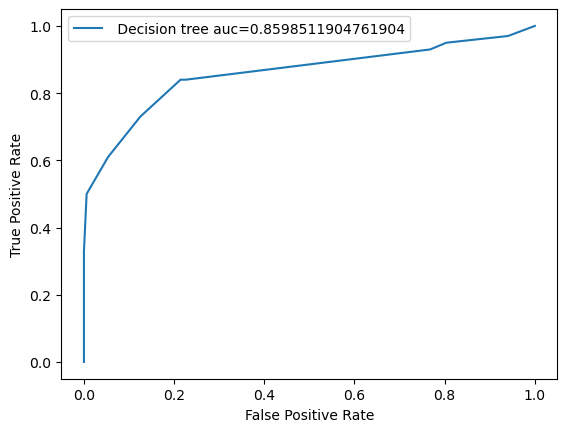

In [331]:
# Extract probabilities of positive outcome for further analysis
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC value
import sklearn.metrics as metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

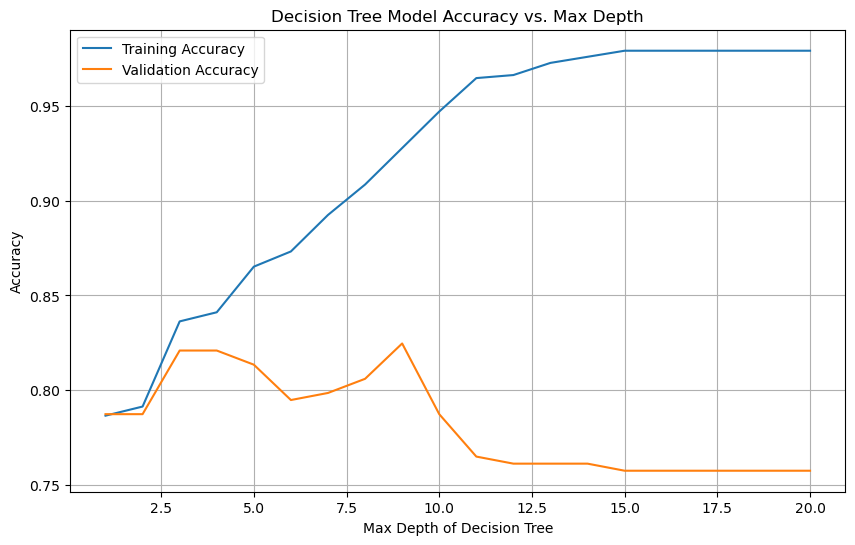

In [332]:
# Explore different max_depth values and plot the training and test accuracies

import matplotlib.pyplot as plt

# Lists to store the accuracies for training and test sets
train_accuracies = []
test_accuracies = []

# Range of `max_depth` values to explore
max_depth_values = range(1, 21)

for depth in max_depth_values:
    # Initialize the model with the current `max_depth`
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    
    # Train the model
    tree.fit(X_train, y_train)
    
    # Record the training set accuracy
    train_accuracy = tree.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Record the test set accuracy
    test_accuracy = tree.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Classifier

In [333]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier

#instantiate random forest object
rf_classifier = RandomForestClassifier(n_estimators=9, random_state=0)

#fit model with training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=0)

In [334]:
# variable for predicted values
y_pred_rf = rf_classifier.predict(X_test)

In [335]:
# print prediction accuracy of test data
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.825


In [336]:
from sklearn.metrics import confusion_matrix

#confusion matrix of predicted result
print('Confusion Matrix - RF')
print(confusion_matrix(y_test, y_pred_rf))


Confusion Matrix - RF
[[146  22]
 [ 25  75]]
